In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
ls

'Dataset MNIST'/               Latihan/          Tes.jpg
 Klasifikasi_MNIST.ipynb       mnist_test.csv    Untitled0.ipynb
 Klasifikasi_MNIST_new.ipynb   mnist_train.csv


In [5]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
print("[INFO] impoting packages...")

[INFO] impoting packages...


In [6]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Latihan")
data = []
labels = []

[INFO] loading images...


In [9]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 32x32 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)
print(labels)

['LPD', 'LPD', 'LPD', 'LPD', 'LPD', 'LPD', 'LPD', 'LPD', 'LPD', 'LPD', 'Sipil', 'Sipil', 'Sipil', 'Sipil', 'Sipil', 'Sipil', 'Sipil', 'Sipil', 'Sipil', 'Sipil', 'Fregat', 'Fregat', 'Fregat', 'Fregat', 'Fregat', 'Fregat', 'Fregat', 'Fregat', 'Fregat', 'Fregat']


In [11]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [12]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [13]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(22, 64, 64, 3)
(8, 64, 64, 3)


In [14]:
from keras.layers import Dropout
#MODEL 1
# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", input_shape=(64, 64, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten()) #menjadi 1 dimensi
model.add(Dropout(0.5))
# model.add(Dense(100))
model.add(Dense(3))
model.add(Activation("softmax")) #softmax, sigmoid, tanh

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         224       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

In [17]:
#MODEL 2
# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", input_shape=(64, 64, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(3))
model.add(Activation("softmax"))

In [18]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=50, batch_size=32)

[INFO] training network...
Epoch 1/50
1/1 [==============================] - 0s 213ms/step - loss: 1.0895 - accuracy: 0.2727 - val_loss: 1.0912 - val_accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 1.0346 - accuracy: 0.3636 - val_loss: 1.0155 - val_accuracy: 0.2500
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 0.9684 - accuracy: 0.3636 - val_loss: 0.9297 - val_accuracy: 0.8750
Epoch 4/50
1/1 [==============================] - 0s 17ms/step - loss: 0.8967 - accuracy: 0.9545 - val_loss: 0.8406 - val_accuracy: 0.8750
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 0.8056 - accuracy: 0.9545 - val_loss: 0.7484 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 0.7046 - accuracy: 0.8636 - val_loss: 0.6307 - val_accuracy: 0.8750
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 0.5871 - accuracy: 0.9545 - val_loss: 0.5256 - val_accuracy: 0.8750

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


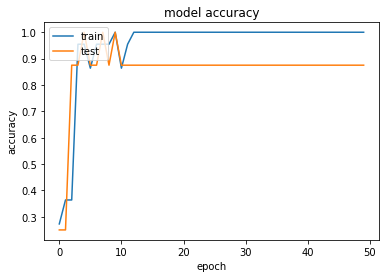

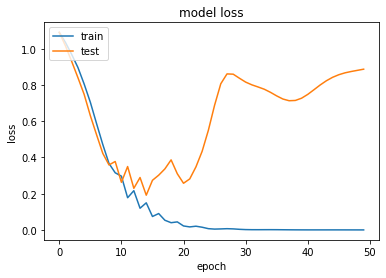

In [19]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      Fregat       1.00      1.00      1.00         3
         LPD       0.67      1.00      0.80         2
       Sipil       1.00      0.67      0.80         3

    accuracy                           0.88         8
   macro avg       0.89      0.89      0.87         8
weighted avg       0.92      0.88      0.88         8



In [21]:
index=5

image = np.expand_dims(testX[index], axis=0)
output = model.predict(image, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[3.1881717e-07 1.8517339e-08 9.9999964e-01]]
['Sipil']


In [22]:
imageY=testY[index]
print(imageY)

[0 0 1]


In [23]:
result = np.where(imageY == np.amax(imageY))
# print('Returned tuple of arrays :', result)
# print('List of Indices of maximum element :', result[0])
print(lb.classes_[result])

['Sipil']


In [32]:
import cv2
import matplotlib.pyplot as plt
image1='Tes.jpg'

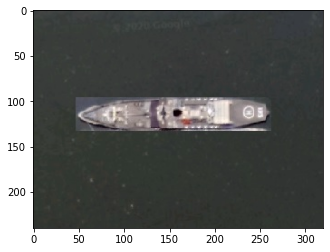

In [33]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [28]:
image_testing = Image.open('Tes.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [29]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [31]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.53894573 0.00101137 0.46004292]]
['Fregat']
